In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

# Fetching Apple's stock data
ticker = yf.Ticker('AAPL')
df = ticker.history(start='2012-01-01', end='2023-05-31')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,12.427379,12.521480,12.415237,12.482928,302220800,0.0,0.0
2012-01-04 00:00:00-05:00,12.445591,12.587654,12.423736,12.550013,260022000,0.0,0.0
2012-01-05 00:00:00-05:00,12.595848,12.705126,12.526638,12.689342,271269600,0.0,0.0
2012-01-06 00:00:00-05:00,12.742158,12.832616,12.725463,12.821992,318292800,0.0,0.0
2012-01-09 00:00:00-05:00,12.916096,12.984395,12.790122,12.801657,394024400,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-23 00:00:00-04:00,173.130005,173.380005,171.279999,171.559998,50747300,0.0,0.0
2023-05-24 00:00:00-04:00,171.089996,172.419998,170.520004,171.839996,45143500,0.0,0.0
2023-05-25 00:00:00-04:00,172.410004,173.899994,171.690002,172.990005,56058300,0.0,0.0


In [ ]:
df.shape

(2870, 7)

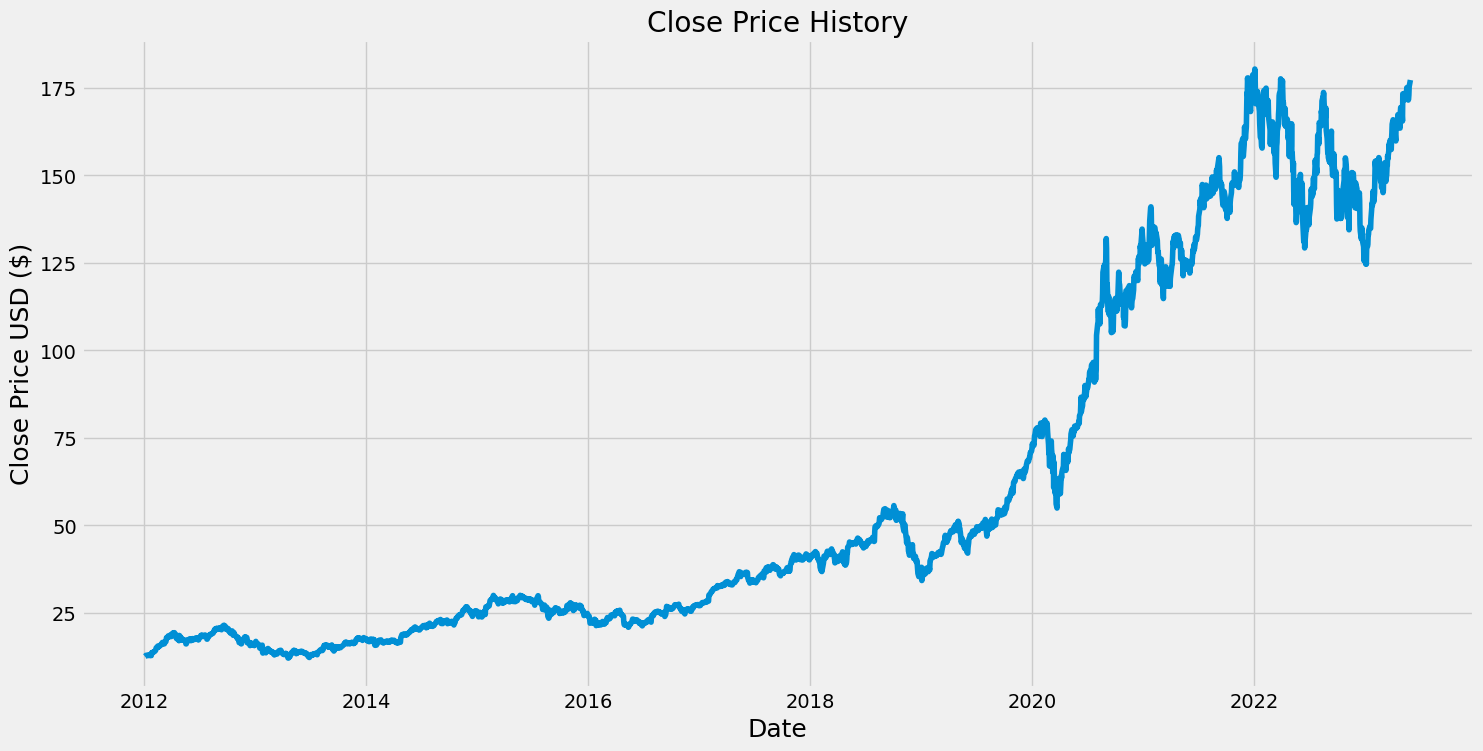

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])

dataset=data.values

training_data_len=math.ceil(len(dataset)* .8)

training_data_len

2296

In [ ]:
#scaling
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00269216],
       [0.00309051],
       [0.00391785],
       ...,
       [0.95579533],
       [0.97028416],
       [0.98138842]])

In [ ]:
train_data=scaled_data[0:training_data_len, :]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00269216, 0.00309051, 0.00391785, 0.00470554, 0.00458479,
       0.00485695, 0.00473258, 0.00452349, 0.0042387 , 0.00512011,
       0.00591502, 0.00566988, 0.00432702, 0.0056086 , 0.00434684,
       0.00907844, 0.00871254, 0.00919021, 0.01022302, 0.01084849,
       0.01079623, 0.01060337, 0.01142529, 0.01219857, 0.01307462,
       0.01448958, 0.01746192, 0.01750695, 0.01916166, 0.02039818,
       0.01827304, 0.01909136, 0.01907517, 0.02136974, 0.02104347,
       0.02164731, 0.02273243, 0.02333628, 0.02507571, 0.02634288,
       0.02670876, 0.02683678, 0.02467018, 0.02414738, 0.0242249 ,
       0.02626179, 0.02683494, 0.02806604, 0.0309681 , 0.03483993,
       0.03411527, 0.03411707, 0.03691641, 0.03779242, 0.03716875,
       0.03659912, 0.03600615, 0.03797622, 0.03932817, 0.03989411])]
[0.03849538833253659]

[array([0.00269216, 0.00309051, 0.00391785, 0.00470554, 0.00458479,
       0.00485695, 0.00473258, 0.00452349, 0.0042387 , 0.00512011,
       0.00591502, 0.00566988, 0.00

In [ ]:
#converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2236, 60)

In [ ]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2236, 60, 1)

LSTM MODEL

In [ ]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compiling the models

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Training the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

2236/2236 [==============================] - 91s 39ms/step - loss: 5.5276e-04


In [ ]:
#creating testing data set

test_data=scaled_data[training_data_len-60:, :]

x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 2s 17ms/step


In [ ]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.007055589199412

<ipython-input-48-f9d5fc7e041c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


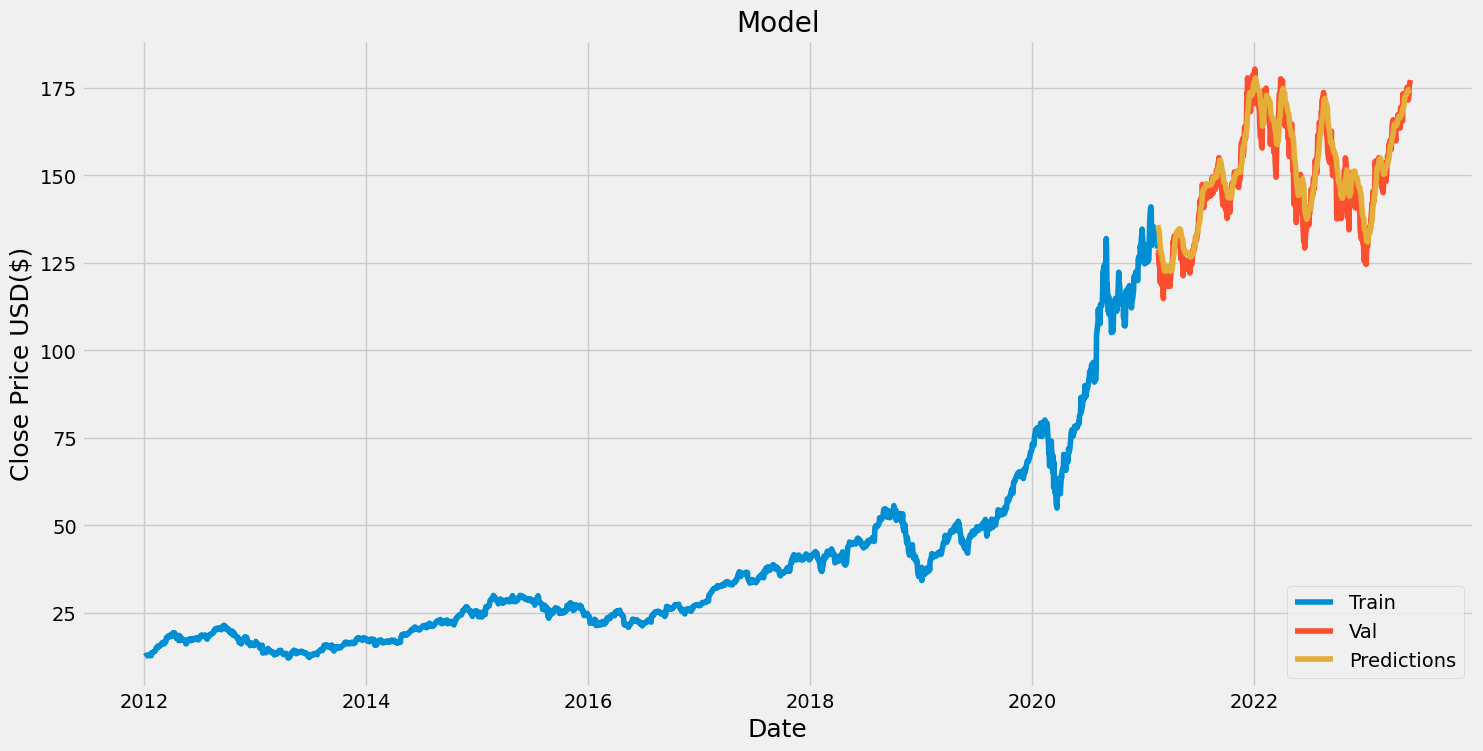

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#Showing the validation and predicted prices
valid

,Close,Predictions
Date,,
2021-02-18 00:00:00-05:00,127.990196,135.841705
2021-02-19 00:00:00-05:00,128.148071,134.981995
2021-02-22 00:00:00-05:00,124.329391,134.168152
2021-02-23 00:00:00-05:00,124.191238,133.009445
2021-02-24 00:00:00-05:00,123.687988,131.843887
...,...,...
2023-05-23 00:00:00-04:00,171.559998,174.583847
2023-05-24 00:00:00-04:00,171.839996,174.507507
2023-05-25 00:00:00-04:00,172.990005,174.327438


In [ ]:
ticker = yf.Ticker('AAPL')
apple_quote = ticker.history(start='2012-01-01', end='2023-05-31')

new_df= apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 28ms/step
[[175.08658]]


In [ ]:
# Fetching Apple's stock data for a range of dates
ticker = yf.Ticker('AAPL')
df = ticker.history(start='2023-05-31', end='2023-06-02')

# Extracting the close price
close_price = df['Close'].values[0]

# Print the close price
print(close_price)

177.25
